In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('ecommerce_customer_data.csv')

In [ ]:
print(df.head())

  CustomerID RegistrationDate   Age             Gender IncomeLevel    Country  \
0        NaN       2020-05-10  25.0                NaN         NaN      Other   
1  CUST00002       2021-07-18   NaN  Prefer not to say        High    Germany   
2  CUST00003       2021-02-04  43.0                NaN        High     France   
3  CUST00004       2020-12-31  49.0             Female        High  Australia   
4  CUST00005       2022-06-27  29.0             Female   Very High  Australia   

          City  TotalPurchases  AverageOrderValue  CustomerLifetimeValue  ...  \
0        Tokyo             4.0          15.886509                    NaN  ...   
1       London             6.0          27.638853             181.725056  ...   
2          NaN            10.0         161.739425            1810.555150  ...   
3  Los Angeles             5.0          14.194263              86.219740  ...   
4        Tokyo             7.0       31147.427206            2112.575945  ...   

  SocialMediaEngagementRat

In [ ]:
df.isnull().sum()

,0
CustomerID,492
RegistrationDate,496
Age,515
Gender,2612
IncomeLevel,2503
Country,493
City,483
TotalPurchases,530
AverageOrderValue,519
CustomerLifetimeValue,493


In [ ]:
numerical_cols = df.select_dtypes(include=['number']).columns
cols_with_nulls = df.columns[df.isnull().any()]
numerical_cols_with_nulls = set(numerical_cols).intersection(cols_with_nulls)

In [ ]:
df.isnull().sum()

,0
CustomerID,492
RegistrationDate,496
Age,515
Gender,2612
IncomeLevel,2503
Country,493
City,483
TotalPurchases,530
AverageOrderValue,519
CustomerLifetimeValue,493


In [ ]:
categorical_cols = df.select_dtypes(exclude=['number']).columns
cat_cols_with_nulls = df.columns[df.isnull().any()]
categorical_cols_with_nulls = set(categorical_cols).intersection(cat_cols_with_nulls)
df.dropna(subset=categorical_cols_with_nulls, inplace=True)

In [ ]:
df.isnull().sum()

,0
CustomerID,0
RegistrationDate,0
Age,102
Gender,0
IncomeLevel,0
Country,0
City,0
TotalPurchases,126
AverageOrderValue,117
CustomerLifetimeValue,105


In [ ]:
# Calculate the mean for all numeric columns
column_means = df.mean(numeric_only=True)

# Fill NaN values in all numeric columns with their respective means
df.fillna(column_means, inplace=True)

In [ ]:
df.isnull().sum()

,0
CustomerID,0
RegistrationDate,0
Age,0
Gender,0
IncomeLevel,0
Country,0
City,0
TotalPurchases,0
AverageOrderValue,0
CustomerLifetimeValue,0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

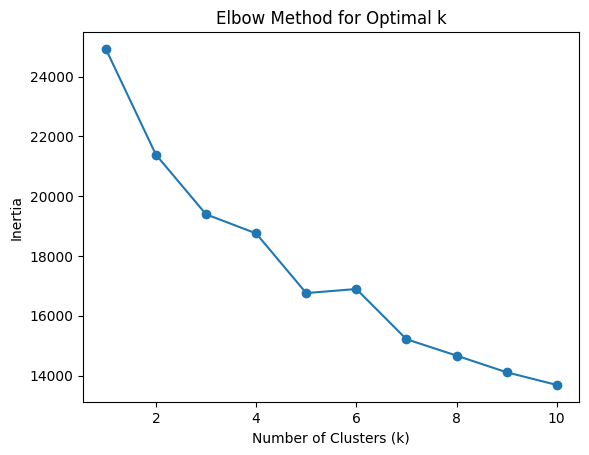

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select numerical features for clustering
X = df.select_dtypes(include=['number'])

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Calculate inertia for different values of k
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Based on the elbow curve, I chose the optimal k
optimal_k = 3  # Example: I chose 3 based on the plot

# Apply K-means with the optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

 **Customer Segmentation and Tailored marketing campaign**

Cluster 1: Young, frugal Customers

*   Discounts and promotions: Offer student discounts, flash sales, and bundle deals to attract price-sensitive customers.
*   Content marketing: Create content that resonates with their interests and lifestyle, such as blog posts or videos about budgeting or affordable fashion.

*   Product recommendations: Suggest budget-friendly products and alternatives.
*   Targeted advertising: Focus on social media platforms and channels frequented by younger audiences.







Cluster 2: Impulse Buyers



*   Limited-time offers: Create a sense of urgency with flash sales and limited-time promotions.
*   Personalized recommendations: Leverage browsing history and purchase data to suggest relevant products.


*   Streamlined checkout process: Make it easy for them to purchase quickly with guest checkout options and one-click ordering.
*   Retargeting campaigns: Remind them of items they've viewed or added to their cart.
